In [1]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#open csv file

df = pd.read_csv("googleplaystore.csv")

print("data has been read")

data has been read


In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
# Remove empty values from table

null = df.isnull().sum().sort_values(ascending = False)
pd.DataFrame(null, columns = ["Total Null"])

,Total Null
Rating,1474
Current Ver,8
Android Ver,3
Content Rating,1
Type,1
Last Updated,0
Genres,0
Price,0
Installs,0
Size,0


In [7]:
df.dropna(inplace = True)
df.shape

(9360, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [9]:
print(df.Category.nunique(), "Categories", "\n")
print(df.Category.unique())

33 Categories 

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


In [10]:
print("There are", df.Category.nunique(), "Categories", "\n")
print(df.Category.unique())

There are 33 Categories 

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


In [11]:
print("There are", df.Genres.nunique(), "Genres", "\n")
print(df.Genres.unique())

There are 115 Genres 

['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business' 'Comics'
 'Comics;Creativity' 'Communication' 'Dating' 'Education;Education'
 'Education' 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Music & Video'
 'Entertainment;Brain Games' 'Entertainment;Creativity' 'Events' 'Finance'
 'Food & Drink' 'Health & Fitness' 'House & Home' 'Libraries & Demo'
 'Lifestyle' 'Lifestyle;Pretend Play' 'Adventure;Action & Adventure'
 'Arcade' 'Casual' 'Card' 'Casual;Pretend Play' 'Action' 'Strategy'
 'Puzzle' 'Sports' 'Music' 'Word' 'Racing' 'Casual;Creativity'
 'Casual;Action & Adventure' 'Simulation' 'Adventure' 'Board' 'Trivia'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educational;Creativity' 'Puzzle;Brain Games

Lakukan beberapa treatment yang dapat dilakukan pada dataset. 

Treatment yang dilakukan dapat berupa mencari 5-Number Summary, mencari Central Tendency, dan sebagainya.

# Category

In [12]:
df_cat = df.set_index(["Category","App"])
df_cat.head()

Rating  \
Category       App                                                          
ART_AND_DESIGN Photo Editor & Candy Camera & Grid & ScrapBook         4.1   
               Coloring book moana                                    3.9   
               U Launcher Lite – FREE Live Cool Themes, Hide Apps     4.7   
               Sketch - Draw & Paint                                  4.5   
               Pixel Draw - Number Art Coloring Book                  4.3   

                                                                  Reviews  \
Category       App                                                          
ART_AND_DESIGN Photo Editor & Candy Camera & Grid & ScrapBook         159   
               Coloring book moana                                    967   
               U Launcher Lite – FREE Live Cool Themes, Hide Apps   87510   
               Sketch - Draw & Paint                               215644   
               Pixel Draw - Number Art Coloring Book                  967   

                                                                   Size  \
Category       App                                                        
ART_AND_DESIGN Photo Editor & Candy Camera & Grid & ScrapBook       19M   
               Coloring book moana                                  14M   
               U Launcher Lite – FREE Live Cool Themes, Hide Apps  8.7M   
               Sketch - Draw & Paint                                25M   
               Pixel Draw - Number Art Coloring Book               2.8M   

                                                                      Installs  \
Category       App                                                               
ART_AND_DESIGN Photo Editor & Candy Camera & Grid & ScrapBook          10,000+   
               Coloring book moana                                    500,000+   
               U Launcher Lite – FREE Live Cool Themes, Hide Apps   5,000,000+   
               Sketch - Draw & Paint                               50,000,000+   
               Pixel Draw - Number Art Coloring Book                  100,000+   

                                                                   Type Price  \
Category       App                                                              
ART_AND_DESIGN Photo Editor & Candy Camera & Grid & ScrapBook      Free     0   
               Coloring book moana                                 Free     0   
               U Launcher Lite – FREE Live Cool Themes, Hide Apps  Free     0   
               Sketch - Draw & Paint                               Free     0   
               Pixel Draw - Number Art Coloring Book               Free     0   

                                                                  Content Rating  \
Category       App                                                                 
ART_AND_DESIGN Photo Editor & Candy Camera & Grid & ScrapBook           Everyone   
               Coloring book moana                                      Everyone   
               U Launcher Lite – FREE Live Cool Themes, Hide Apps       Everyone   
               Sketch - Draw & Paint                                        Teen   
               Pixel Draw - Number Art Coloring Book                    Everyone   

                                                                                      Genres  \
Category       App                                                                             
ART_AND_DESIGN Photo Editor & Candy Camera & Grid & ScrapBook                   Art & Design   
               Coloring book moana                                 Art & Design;Pretend Play   
               U Launcher Lite – FREE Live Cool Themes, Hide Apps               Art & Design   
               Sketch - Draw & Paint                                            Art & Design   
               Pixel Draw - Number Art Coloring Book                 Art & Design;Creativity   

                                                        

## Rating

In [13]:
df_cat.sort_values("Rating", ascending = False).head(3)

,,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
Category,App,,,,,,,,,,,
EVENTS,Mindvalley U Tallinn 2018,5.0,1,21M,100+,Free,0,Everyone,Events,"July 3, 2018",1.0.5,4.4 and up
PRODUCTIVITY,Ek Vote,5.0,43,6.2M,500+,Free,0,Everyone,Productivity,"November 7, 2017",1.1,4.0.3 and up
TOOLS,ei Calc,5.0,2,19M,10+,Free,0,Everyone,Tools,"October 12, 2015",1.2.2,2.3 and up


##### 5 Num Sum

In [14]:
df_cat["Rating"].describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [15]:
pd.DataFrame(df.groupby("Category")
             .Rating.agg(pd.Series.mode)).reset_index()

,Category,Rating
0,ART_AND_DESIGN,4.7
1,AUTO_AND_VEHICLES,4.6
2,BEAUTY,4.7
3,BOOKS_AND_REFERENCE,4.5
4,BUSINESS,4.4
5,COMICS,4.4
6,COMMUNICATION,4.3
7,DATING,4.1
8,EDUCATION,4.6
9,ENTERTAINMENT,4.2


##### Central Tendency

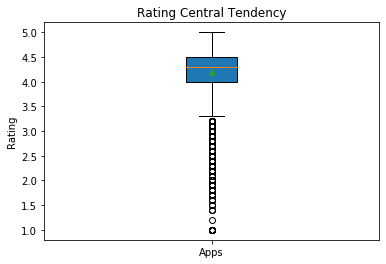

In [16]:
plt.boxplot(np.array(df_cat.Rating),showmeans = True, patch_artist = True, labels = ["Apps"])

plt.ylabel("Rating")
plt.title("Rating Central Tendency")
plt.show()
plt.close()

##### Z Score

In [17]:
stats.zscore(df_cat.Rating)

array([-0.17824396, -0.56641601,  0.9862722 , ...,  1.56853027,
        0.59810014,  0.59810014])

##### Skewness

In [18]:
df_cat["Rating"].skew()

-1.8501346146929738

## Price

In [19]:
df.Type.unique()

array(['Free', 'Paid'], dtype=object)

In [20]:
df_paid = df[df["Type"] == "Paid"].set_index(["Category","App"])
df_paid.head()

Rating Reviews  \
Category      App                                                             
BUSINESS      TurboScan: scan documents and receipts in PDF     4.7   11442   
              Tiny Scanner Pro: PDF Doc Scan                    4.8   10295   
              TurboScan: scan documents and receipts in PDF     4.7   11442   
              Tiny Scanner Pro: PDF Doc Scan                    4.8   10295   
COMMUNICATION Puffin Browser Pro                                4.0   18247   

                                                                           Size  \
Category      App                                                                 
BUSINESS      TurboScan: scan documents and receipts in PDF                6.8M   
              Tiny Scanner Pro: PDF Doc Scan                                39M   
              TurboScan: scan documents and receipts in PDF                6.8M   
              Tiny Scanner Pro: PDF Doc Scan                                39M   
COMMUNICATION Puffin Browser Pro                             Varies with device   

                                                             Installs  Type  \
Category      App                                                             
BUSINESS      TurboScan: scan documents and receipts in PDF  100,000+  Paid   
              Tiny Scanner Pro: PDF Doc Scan                 100,000+  Paid   
              TurboScan: scan documents and receipts in PDF  100,000+  Paid   
              Tiny Scanner Pro: PDF Doc Scan                 100,000+  Paid   
COMMUNICATION Puffin Browser Pro                             100,000+  Paid   

                                                             Price  \
Category      App                                                    
BUSINESS      TurboScan: scan documents and receipts in PDF  $4.99   
              Tiny Scanner Pro: PDF Doc Scan                 $4.99   
              TurboScan: scan documents and receipts in PDF  $4.99   
              Tiny Scanner Pro: PDF Doc Scan                 $4.99   
COMMUNICATION Puffin Browser Pro                             $3.99   

                                                            Content Rating  \
Category      App                                                            
BUSINESS      TurboScan: scan documents and receipts in PDF       Everyone   
              Tiny Scanner Pro: PDF Doc Scan                      Everyone   
              TurboScan: scan documents and receipts in PDF       Everyone   
              Tiny Scanner Pro: PDF Doc Scan                      Everyone   
COMMUNICATION Puffin Browser Pro                                  Everyone   

                                                                    Genres  \
Category      App                                                            
BUSINESS      TurboScan: scan documents and receipts in PDF       Business   
              Tiny Scanner Pro: PDF Doc Scan                      Business   
              TurboScan: scan documents and receipts in PDF       Business   
              Tiny Scanner Pro: PDF Doc Scan                      Business   
COMMUNICATION Puffin Browser Pro                             Communication   

                                                               Last Updated  \
Category      App                                                             
BUSINESS      TurboScan: scan documents and receipts in PDF  March 25, 2018   
              Tiny Scanner Pro: PDF Doc Scan                 April 11, 2017   
              TurboScan: scan documents and receipts in PDF  March 25, 2018   
              Tiny Scanner Pro: PDF Doc Scan                 April 11, 2017   
COMMUNICATION Puffin Browser Pro                               July 5, 2018   

                                                             Current Ver  \
Category      App                                                          
BUSINESS      TurboScan: scan documents and receipts in PDF        1.5.2   
    

In [21]:
df_paid.Price = df_paid.Price.apply(lambda x: x.replace('$',''))
df_paid["Price"] = df_paid["Price"].apply(lambda x: float(x))

In [22]:
df_paid.sort_values("Price", ascending = False).head(3)

,,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
Category,App,,,,,,,,,,,
LIFESTYLE,I'm Rich - Trump Edition,3.6,275,7.3M,"10,000+",Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
FINANCE,I Am Rich Premium,4.1,1867,4.7M,"50,000+",Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
LIFESTYLE,💎 I'm rich,3.8,718,26M,"10,000+",Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up


##### 5 Num Sum

In [23]:
df_paid["Price"].describe()

count    645.000000
mean      13.949721
std       58.791144
min        0.990000
25%        1.990000
50%        2.990000
75%        4.990000
max      400.000000
Name: Price, dtype: float64

In [24]:
pd.DataFrame(df_paid.groupby("Category").Price.agg(pd.Series.mode))

,Price
Category,
ART_AND_DESIGN,1.99
AUTO_AND_VEHICLES,0 1.99 dtype: float64
BOOKS_AND_REFERENCE,0 0.99 1 1.75 2 1.99 3 2.99 4 3...
BUSINESS,0 4.99 dtype: float64
COMMUNICATION,0 0.99 1 1.49 dtype: float64
DATING,0 3.99 dtype: float64
EDUCATION,0 3.99 dtype: float64
ENTERTAINMENT,0 2.99 1 4.99 dtype: float64
FAMILY,0 2.99 dtype: float64


#### Central Tendency

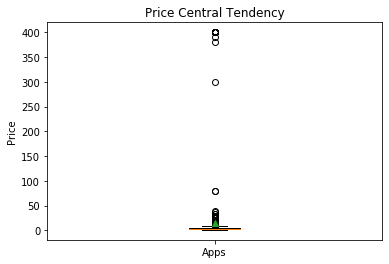

In [25]:
plt.boxplot(np.array(df_paid.Price),showmeans = True, labels = ["Apps"])

plt.ylabel("Price")
plt.title("Price Central Tendency")
plt.show()
plt.close()

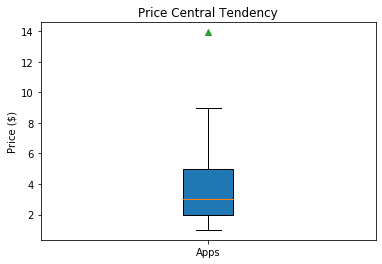

In [26]:
plt.boxplot(np.array(df_paid.Price),
            showfliers = False,showmeans = True, patch_artist = True, labels = ["Apps"])

plt.ylabel("Price ($)")
plt.title("Price Central Tendency")
plt.show()
plt.close()

##### Z Score

In [27]:
stats.zscore(df_paid.Price)

array([-1.52517436e-01, -1.52517436e-01, -1.52517436e-01, -1.52517436e-01,
       -1.69540001e-01, -1.69540001e-01, -1.18472305e-01, -1.01449740e-01,
       -1.69540001e-01, -1.69540001e-01, -1.35494870e-01, -1.69540001e-01,
       -1.69540001e-01, -1.52517436e-01, -1.86562567e-01, -1.78051284e-01,
       -1.52517436e-01, -1.86562567e-01, -1.69540001e-01, -1.86562567e-01,
       -1.86562567e-01, -1.86562567e-01, -2.03585132e-01, -1.52517436e-01,
       -1.52517436e-01, -1.52517436e-01, -1.35494870e-01, -1.18472305e-01,
       -6.74046087e-02, -1.52517436e-01, -1.69540001e-01, -1.86562567e-01,
       -1.69540001e-01, -1.86562567e-01, -1.69540001e-01, -1.69540001e-01,
       -1.52517436e-01, -1.69540001e-01, -1.86562567e-01, -1.09961022e-01,
       -1.86562567e-01, -2.20607698e-01, -2.20607698e-01, -2.20607698e-01,
       -1.52517436e-01, -1.86562567e-01, -1.52517436e-01, -1.86562567e-01,
       -1.52517436e-01, -1.52517436e-01, -1.86562567e-01, -1.86562567e-01,
       -1.69540001e-01, -